In [1]:
import pandas as pd

In [2]:
fn = '../data/codex_info.xlsx'
sheets = pd.read_excel(fn, sheet_name=None)
del sheets['OVERVIEW']

In [3]:
sheets.keys()

dict_keys(['KBR 394-98', 'KBR 1805-08', 'KBR 2485', 'KBR 2849-51', 'KBR 2877-78', 'KBR 2879-80', 'KBR 2905-09', 'KBR 2979', 'KBR 3091', 'KBR 3093-95', 'Ghent UB 941', 'Ghent UB 1374', 'BA 8224', 'MA 920', 'BAN O256', 'ÖNB 13708', 'ÖNB 65', 'ÖNB 12905', 'ÖNB 12857'])

In [4]:
H = pd.concat(sheets.values())
H.reset_index(inplace=True, drop=True)

In [5]:
H.sample(10)

,codex_sig,transkribuspage,filename,folium,layout,content,language,scribe,production unit,local Herne product,date,translator,transcription,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
3094,"Brussel, KBR, 3091",332,332_164v.tiff,164v,corrected,tabernRuusbr,middledutch,ε,I,yes,1350-1375,NaN,none,NaN,NaN,NaN,NaN
5014,"Wenen, ÖNB 13.708",331,332.jpg,159r,corrected,sph2-6,middledutch,α,VIII,yes,1402,NaN,none,NaN,NaN,NaN,NaN
4839,"Wenen, ÖNB 13.708",156,157.jpg,73v,corrected,sph2-3,middledutch,α,V,yes,1402,NaN,none,NaN,NaN,NaN,NaN
5270,"Wenen, ÖNB 65",64,00000064.jpg,29v,corrected,horlogium,middledutch,α,II,yes,1375-1400,NaN,none,NaN,NaN,NaN,NaN
655,"Brussel, KBR, 2485",22,NaN,10v,corrected,benedictrule,middledutch,β,II,yes,1373,bibletranslator,GT,NaN,NaN,NaN,NaN
718,"Brussel, KBR, 2485",85,NaN,42r,corrected,benedictrule,middledutch,β,II,yes,1373,bibletranslator,GT,NaN,NaN,NaN,NaN
3525,"Brusssel, KBR, 3093-95",301,KBR_Ms3093-3095-0301.jpg,148r,corrected,overpBernard,middledutch,α,II,yes,1375-1400,NaN,GT,NaN,NaN,NaN,NaN
4965,"Wenen, ÖNB 13.708",282,283.jpg,134Bv,corrected,sph2-5,middledutch,α,VII,yes,1402,NaN,none,NaN,NaN,NaN,NaN
2890,"Brussel, KBR, 3091",128,128_62v.tiff,62v,corrected,tabernRuusbr,middledutch,ε,I,yes,1350-1375,NaN,none,NaN,NaN,NaN,NaN
4501,"Sint-Petersburg, BAN, O 256",34,NaN,32v-33r,corrected,evangMath,middledutch,G,II,unknown,1325-1350,NaN,none,NaN,NaN,NaN,NaN


In /Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/mikekestemont/anaconda3/envs/n36/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

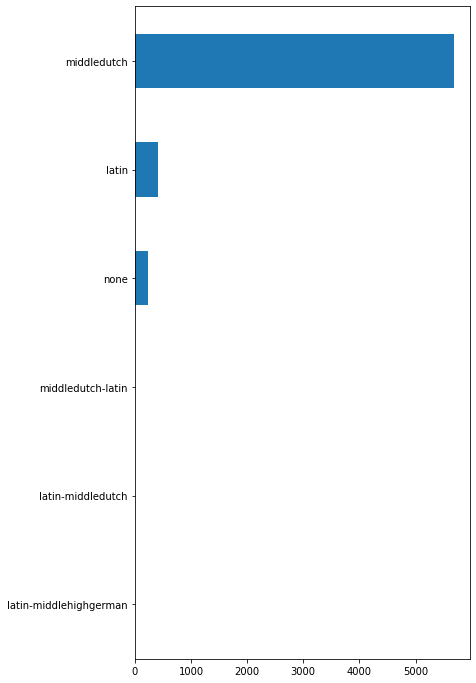

In [6]:
H['language'].value_counts()[::-1].plot.barh(figsize=(6, 12));

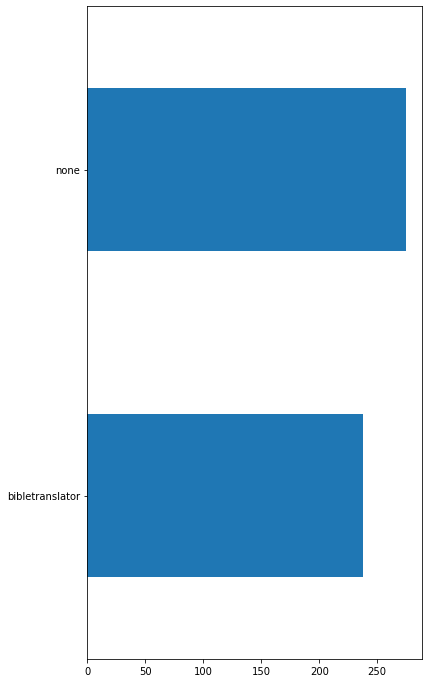

In [7]:
H['translator'].value_counts()[::-1].plot.barh(figsize=(6, 12));

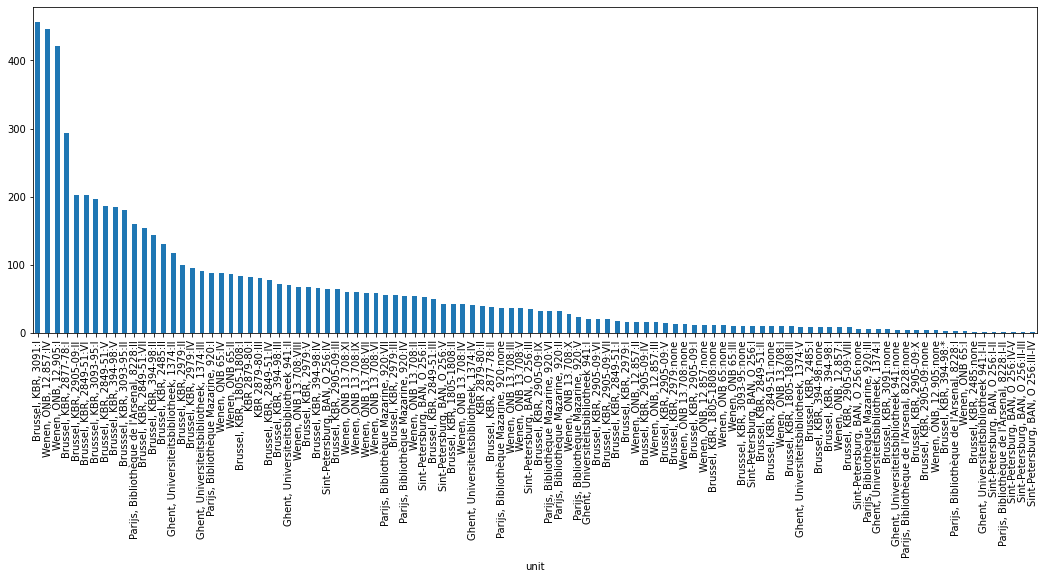

In [8]:
H['unit'] = H['codex_sig'] + ':' + H['production unit']
H.groupby('unit').size().sort_values(ascending=False).plot.bar(figsize=(18, 6));

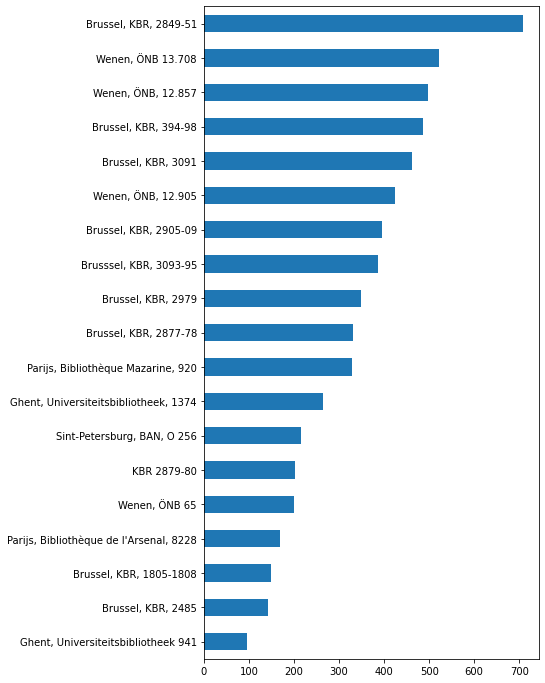

In [9]:
H['codex_sig'].value_counts()[::-1].plot.barh(figsize=(6, 12));

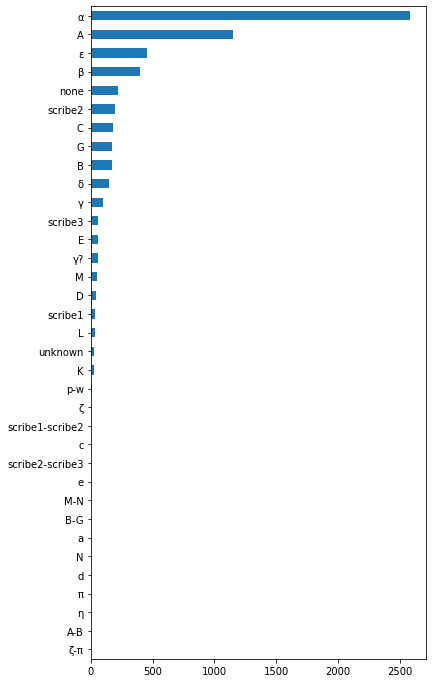

In [10]:
H['scribe'].value_counts()[::-1].plot.barh(figsize=(6, 12));

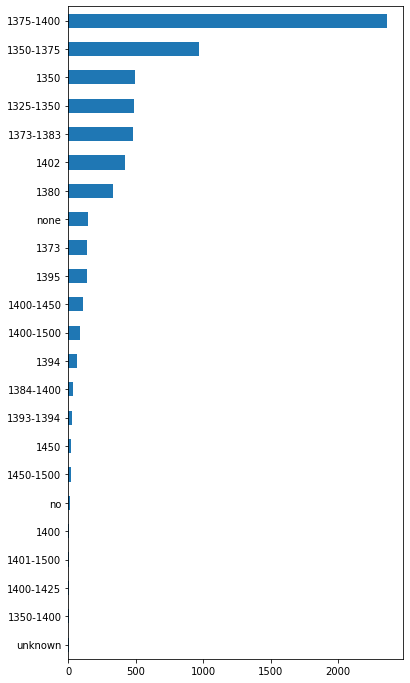

In [11]:
H['date'].value_counts()[::-1].plot.barh(figsize=(6, 12));

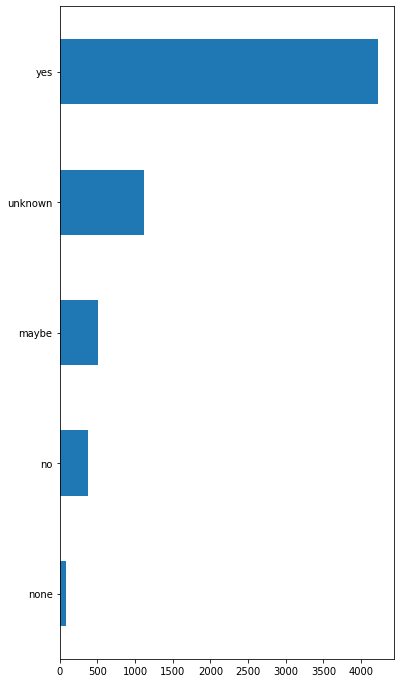

In [12]:
H['local Herne product'].value_counts()[::-1].plot.barh(figsize=(6, 12));

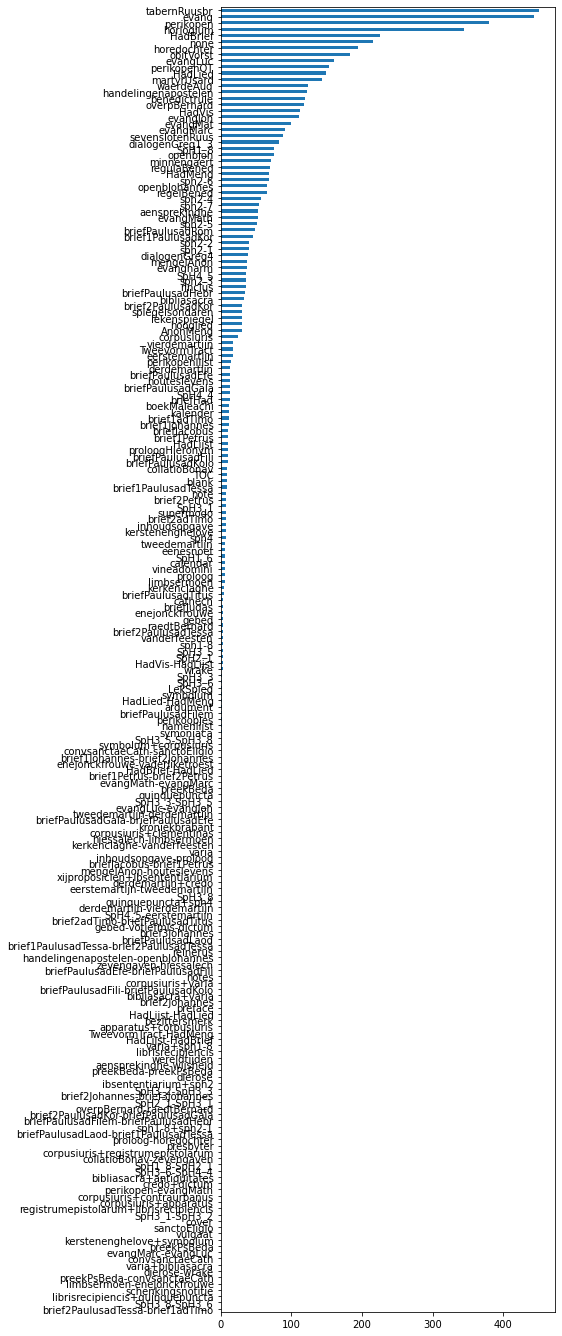

In [13]:
H['content'].value_counts()[::-1].plot.barh(figsize=(6, 24));

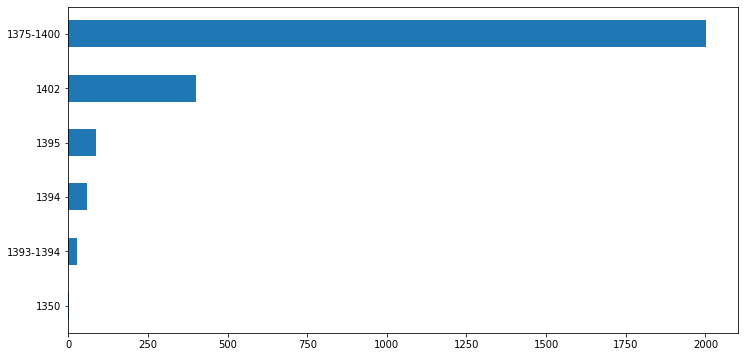

In [14]:
H[H['scribe'] == 'α']['date'].value_counts()[::-1].plot.barh(figsize=(12, 6));

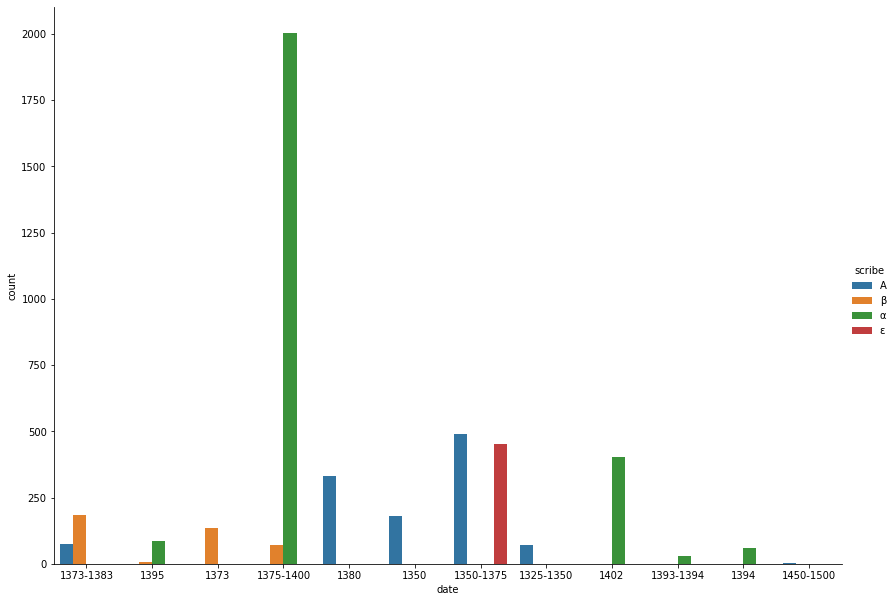

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

top_scribes = Counter(H['scribe']).most_common(4)
top_scribes = [v for v, k in top_scribes]

H_top = H[H['scribe'].isin(top_scribes)]
sns.catplot(kind='count', x='date', hue='scribe', data=H_top, height=8.27, aspect=11.7/8.27);

In [16]:
num_dates = []

for d in H['date']:
    if d in ('unknown', 'no'):
        d = None
    else:
        try:
            d = int(d)
        except ValueError:
            if '-' in d:
                d1, d2 = d.split('-')
                d1, d2 = int(d1), int(d2)
                d = d1 + ((d2 - d1) / 2)
            if d == 'none':
                d = None
    num_dates.append(d)
    
H['num_date'] = num_dates

In [17]:
H['num_date'] = H['num_date'].astype(float)

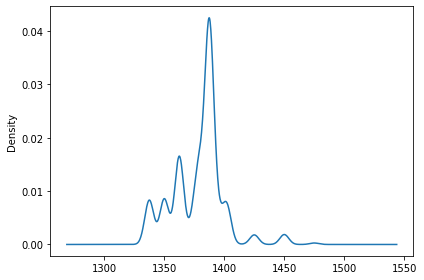

In [18]:
H['num_date'].plot.kde()
plt.tight_layout()